# Prediction for Binary Model

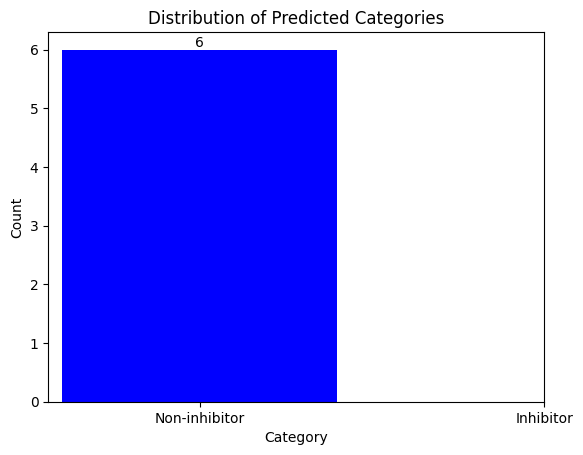

In [7]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
import joblib
import matplotlib.pyplot as plt

# Step 1: Read the CSV file and remove duplicate SMILES
df = pd.read_csv('test.csv', header=None)
df.drop_duplicates(subset=df.columns[1], keep='first', inplace=True)

# Step 2: Convert SMILES to Morgan fingerprints and filter out invalid ones
valid_indices = []
fingerprints = []
for idx, smile in enumerate(df.iloc[:, 1]):
    mol = Chem.MolFromSmiles(smile)
    if mol is not None:
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=2048)
        fingerprints.append(fingerprint)
        valid_indices.append(idx)

df_valid = df.iloc[valid_indices, :].copy()
df_valid.reset_index(drop=True, inplace=True)

# Step 3: Extract selected features
with open('selected_features_Cyp450.txt', 'r') as f:
    selected_features = [int(line.strip().split('_')[1]) for line in f.readlines()]

# Extract selected features from fingerprints
fingerprints_selected = [np.array(fingerprint)[selected_features] for fingerprint in fingerprints]

# Step 4: Load the trained model
model = joblib.load('ETC_model_selected_features.pkl')

# Step 5: Make predictions and add results to the dataframe
X = np.array(fingerprints_selected)
predictions = model.predict(X)
df_valid['Prediction'] = predictions

# Step 6: Create a bar plot
counts = df_valid['Prediction'].value_counts()
plt.bar(counts.index, counts.values, color=['blue', 'red'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-inhibitor', 'Inhibitor'])
for i, value in enumerate(counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.title('Distribution of Predicted Categories')
plt.show()

# Save the updated dataframe with predictions
df_valid.to_csv('predicted_results_CYP450.csv', header=False, index=False)


# Prediction for Regression Model

/home/parth/miniconda3/envs/ML_QSAR/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


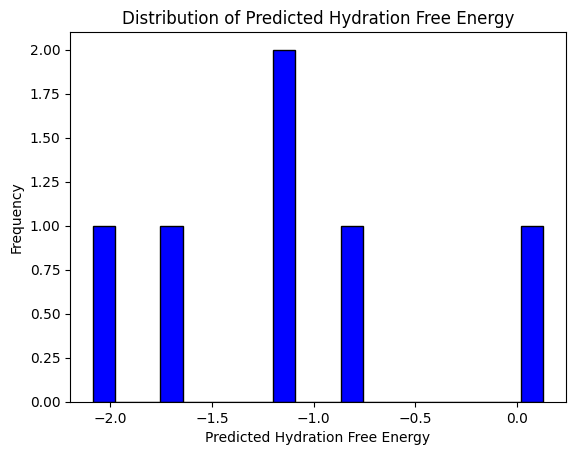

In [12]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
import joblib
import matplotlib.pyplot as plt

# Step 1: Read the CSV file and remove duplicate SMILES
df = pd.read_csv('test.csv', header=None)
df.drop_duplicates(subset=df.columns[1], keep='first', inplace=True)

# Step 2: Convert SMILES to Morgan fingerprints and filter out invalid ones
valid_indices = []
fingerprints = []
for idx, smile in enumerate(df.iloc[:, 1]):
    mol = Chem.MolFromSmiles(smile)
    if mol is not None:
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=2048)
        fingerprints.append(fingerprint)
        valid_indices.append(idx)

df_valid = df.iloc[valid_indices, :].copy()
df_valid.reset_index(drop=True, inplace=True)

# Step 3: Extract selected features
with open('selected_features_HFE.txt', 'r') as f:
    selected_features = [int(line.strip().split('_')[1]) for line in f.readlines()]

# Extract selected features from fingerprints
fingerprints_selected = [np.array(fingerprint)[selected_features] for fingerprint in fingerprints]

# Step 4: Load the trained regression model
model = joblib.load('RF_model_HFE.pkl')

# Step 5: Make predictions and add results to the dataframe
X = np.array(fingerprints_selected)
predictions = model.predict(X)
df_valid['Predicted_Hydration_Free_Energy'] = predictions

# Step 6: Create a bar plot
plt.hist(predictions, bins=20, color='blue', edgecolor='black')
plt.xlabel('Predicted Hydration Free Energy')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Hydration Free Energy')
plt.show()

# Save the updated dataframe with predictions
df_valid.to_csv('predicted_results_with_HFE.csv', header=False, index=False)
